In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aggregated_hemnet.csv').drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

In [3]:
df.columns = ['date', 'area', 'price_sqm', 'asking_price', 'nbr_rooms',
       'living_space', 'rent', 'additional', 'year_built', 'closing_price',
       'bi_area', 'price_inc_percent']

In [4]:
df.corr()['price_sqm']

price_sqm            1.000000
asking_price         0.169107
nbr_rooms           -0.180821
living_space        -0.165208
rent                -0.358677
additional          -0.075175
year_built          -0.100974
closing_price        0.213573
bi_area              0.075368
price_inc_percent    0.346521
Name: price_sqm, dtype: float64

In [5]:
df.date = pd.to_datetime(df.date)
num_dt = pd.to_numeric(df.date)
num_dt = (num_dt - num_dt.min())/(num_dt.max() - num_dt.min())
df['time'] = num_dt
df.loc[df.bi_area.isna(), 'bi_area'] = 0
df.loc[df.additional.isna(), 'additional'] = 0
df = df.loc[~df.rent.isna()]
df = df.loc[~df.year_built.isna()]
df = df.loc[(df.year_built != 0) & (df.year_built != 189.0)]
df = df.loc[~df.living_space.isna()]
df = df.loc[~df.nbr_rooms.isna()]
df = df.reset_index(drop=True)

In [6]:
df1 = df.drop('date', axis=1)

In [7]:
df1

,area,price_sqm,asking_price,nbr_rooms,living_space,rent,additional,year_built,closing_price,bi_area,price_inc_percent,time
0,sodermalm,102500.0,3495000.0,1.0,40.0,1160.0,9500.0,1889.0,4100000,0.0,0.173104,1.000000
1,kungsholmen,107955.0,1995000.0,1.0,22.0,1581.0,2800.0,1937.0,2375000,0.0,0.190476,1.000000
2,vasastan,108500.0,4495000.0,2.0,50.0,550.0,3600.0,1912.0,5425000,0.0,0.206897,0.999608
3,kungsholmen,103704.0,2800000.0,1.0,27.0,790.0,4164.0,1937.0,2800000,0.0,0.000000,0.999608
4,lilla_essingen,62202.0,4995000.0,3.0,84.0,3689.0,5500.0,1939.0,5225000,0.0,0.046046,0.999608
...,...,...,...,...,...,...,...,...,...,...,...,...
13441,lilla_essingen,57750.0,2195000.0,2.0,40.0,2464.0,0.0,1938.0,2310000,0.0,0.052392,0.021143
13442,lilla_essingen,50357.0,2195000.0,1.5,42.0,2436.0,6680.0,1936.0,2115000,0.0,-0.036446,0.019969
13443,stora_essingen,44940.0,3700000.0,2.5,84.0,3732.0,9616.0,1935.0,3775000,0.0,0.020270,0.014879
13444,lilla_essingen,47500.0,1950000.0,1.5,40.0,2269.0,3400.0,1939.0,1900000,0.0,-0.025641,0.012529


In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

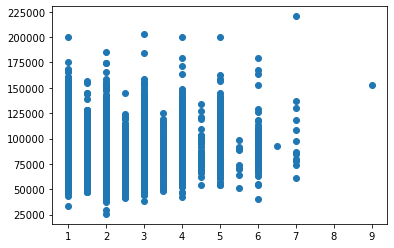

In [9]:
plt.scatter(df.nbr_rooms, df.price_sqm)

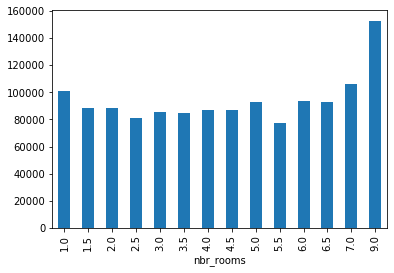

In [10]:
df.groupby('nbr_rooms')['price_sqm'].mean().plot.bar()

In [37]:
X = pd.get_dummies(df[['price_sqm', 'living_space', 'rent', 'bi_area', 'time', 'nbr_rooms', 'additional', 'area', 'closing_price']])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop('closing_price', axis=1),
                                                    X.closing_price,
                                                    test_size=.3,
                                                    random_state=42)

In [39]:
#X = df[['living_space', 'price_sqm']]

In [40]:
model = IsolationForest(random_state=42,
                        max_features=X_train.shape[1],
                        n_estimators=1000,
                        contamination=.01)
model.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=15, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [41]:
X_train

,price_sqm,living_space,rent,bi_area,time,nbr_rooms,additional,area_gamla_stan,area_gardet,area_kungsholmen,area_lilla_essingen,area_ostermalm,area_sodermalm,area_stora_essingen,area_vasastan
9193,103971.0,34.0,1286.0,0.0,0.816366,2.0,4569.0,0,0,0,0,1,0,0,0
1728,93804.0,46.0,2126.0,0.0,0.968677,2.0,0.0,0,0,1,0,0,0,0,0
12285,144559.0,68.0,2037.0,8.0,0.537980,2.5,5496.0,0,0,0,0,1,0,0,0
12208,114516.0,93.0,844.0,0.0,0.548943,3.0,0.0,0,0,0,0,1,0,0,0
9647,85875.0,40.0,2754.0,0.0,0.791308,1.5,3000.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,93714.0,87.5,3342.0,0.0,0.900940,3.0,8000.0,0,0,0,0,1,0,0,0
13418,63333.0,30.0,2667.0,0.0,0.045419,1.0,0.0,0,0,0,0,0,0,1,0
5390,95122.0,41.0,2140.0,0.0,0.897807,2.0,3300.0,0,1,0,0,0,0,0,0
860,95139.0,72.0,2081.0,0.0,0.982381,2.0,5200.0,0,0,0,0,1,0,0,0


In [50]:
colors = model.decision_function(X_test)
colors = (colors - colors.min())/(colors.max() - colors.min())

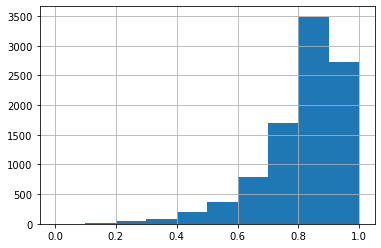

In [45]:
pd.Series(colors).hist()

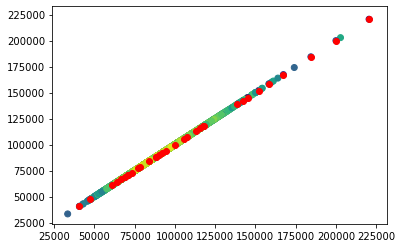

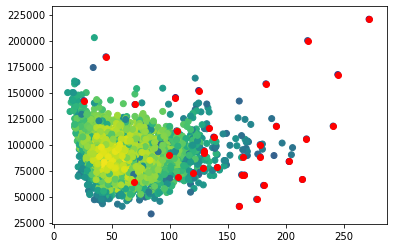

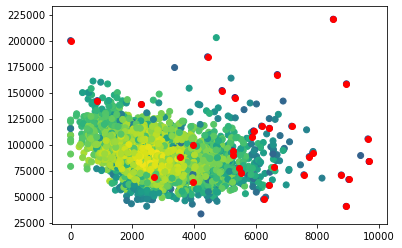

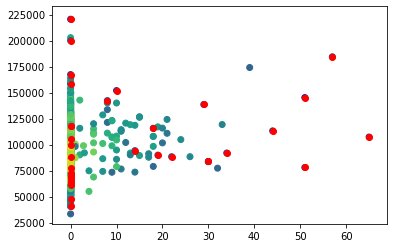

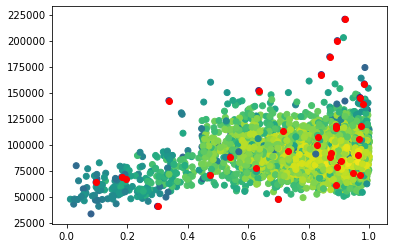

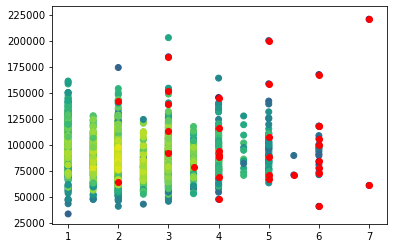

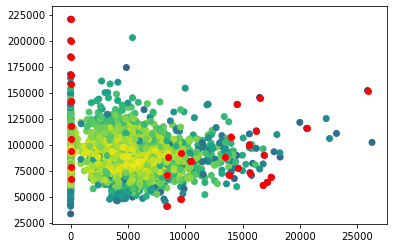

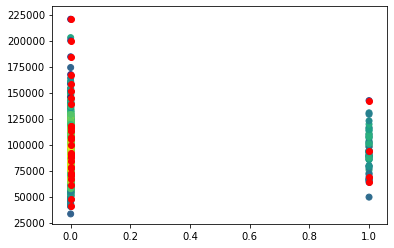

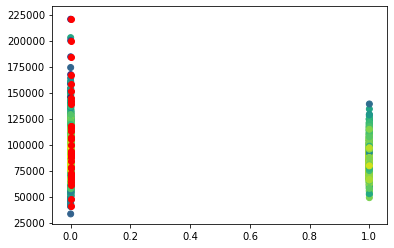

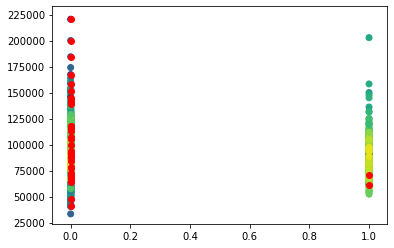

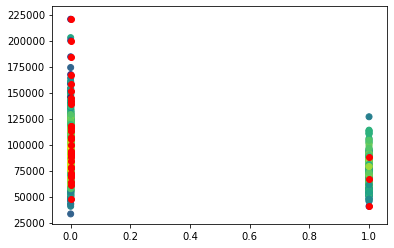

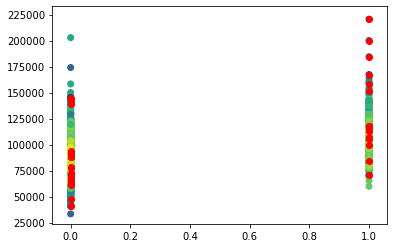

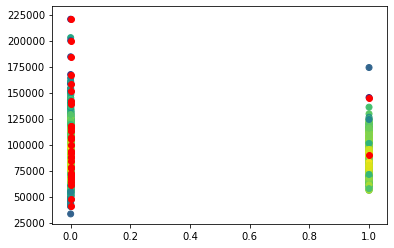

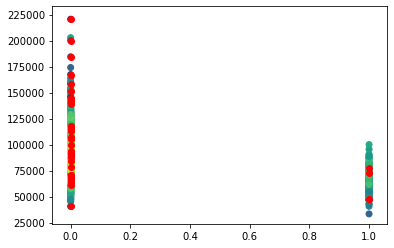

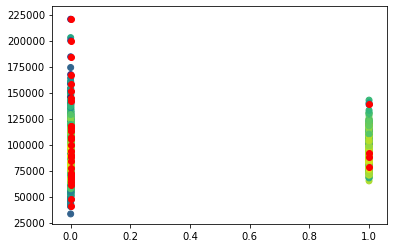

In [51]:
for col in X_test.columns:
    plt.scatter(X_test[col], X_test.price_sqm, c=colors)
    plt.scatter(X_test.loc[colors<0.3][col], X_test.loc[colors<.3].price_sqm, c='r')
    plt.show()

# Perform regression on closing price

In [55]:
def standardize(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop('closing_price', axis=1),
                                                    X.closing_price,
                                                    test_size=.3,
                                                    random_state=42)

anomaly_model = IsolationForest(random_state=42,
                        max_features=X_train.shape[1],
                        n_estimators=1000)
anomaly_model.fit(X_train)

dec_train = standardize(anomaly_model.decision_function(X_train))
dec_test = standardize(anomaly_model.decision_function(X_test))

In [224]:
score_dict['0.0'] = 0

In [225]:
X_train

,price_sqm,living_space,rent,bi_area,time,nbr_rooms,additional,area_gamla_stan,area_gardet,area_kungsholmen,area_lilla_essingen,area_ostermalm,area_sodermalm,area_stora_essingen,area_vasastan
9193,103971.0,34.0,1286.0,0.0,0.816366,2.0,4569.0,0,0,0,0,1,0,0,0
1728,93804.0,46.0,2126.0,0.0,0.968677,2.0,0.0,0,0,1,0,0,0,0,0
12285,144559.0,68.0,2037.0,8.0,0.537980,2.5,5496.0,0,0,0,0,1,0,0,0
12208,114516.0,93.0,844.0,0.0,0.548943,3.0,0.0,0,0,0,0,1,0,0,0
9647,85875.0,40.0,2754.0,0.0,0.791308,1.5,3000.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,93714.0,87.5,3342.0,0.0,0.900940,3.0,8000.0,0,0,0,0,1,0,0,0
13418,63333.0,30.0,2667.0,0.0,0.045419,1.0,0.0,0,0,0,0,0,0,1,0
5390,95122.0,41.0,2140.0,0.0,0.897807,2.0,3300.0,0,1,0,0,0,0,0,0
860,95139.0,72.0,2081.0,0.0,0.982381,2.0,5200.0,0,0,0,0,1,0,0,0


In [226]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
cutoffs = np.arange(0,100,5)*0.01

score_dict = {}
predictions = {}
for cutoff in cutoffs:
    X_train_2 = X_train.loc[dec_train >= cutoff].drop('price_sqm', axis=1)
    X_test_2 = X_test.loc[dec_test >= cutoff].drop('price_sqm', axis=1)
    y_train_2 = y_train.loc[dec_train >= cutoff]
    y_test_2 = y_test.loc[dec_test >= cutoff]
    
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train_2, y_train_2)

    y_true = y_test_2
    
    scoring = {'mse' : mean_squared_error, 
               'mae' : mean_absolute_error}
    
    y_pred = clf.predict(X_test_2)
    predictions[cutoff] = y_pred
    score_dict[cutoff] = {}
    for k in scoring.keys():
        score_dict[cutoff][k] = scoring[k](y_true, y_pred)
    score_dict[cutoff]['percentage'] = len(y_test_2)/len(y_test)

In [227]:
scores = pd.DataFrame.from_dict(score_dict,orient='index')

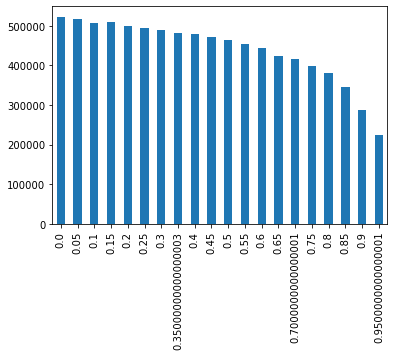

In [230]:
scores['mae'].plot.bar()

In [231]:
scores['percentage']

0.00    1.000000
0.05    0.999752
0.10    0.999008
0.15    0.998265
0.20    0.996282
0.25    0.994051
0.30    0.991820
0.35    0.987853
0.40    0.979177
0.45    0.969261
0.50    0.954636
0.55    0.933565
0.60    0.909519
0.65    0.870104
0.70    0.818294
0.75    0.746653
0.80    0.652454
0.85    0.491572
0.90    0.275161
0.95    0.063461
Name: percentage, dtype: float64

In [277]:
cutoff

0.9500000000000001

In [285]:
variance = {}
for cutoff in cutoffs:
    variance[cutoff] = y_test.loc[dec_test >= cutoff].var()

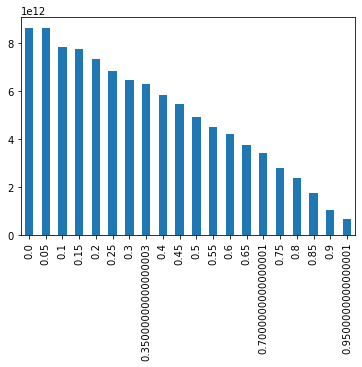

In [288]:
pd.DataFrame.from_dict(variance, orient='index')[0].plot.bar()

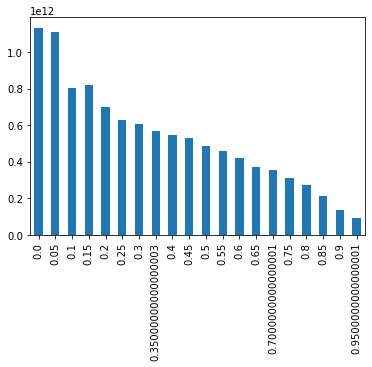

In [238]:
((scores['mse'])).plot.bar()

In [233]:
score_norm = (scores - scores.min())/(scores.max() - scores.min())

In [239]:
score_norm['sum']  = (score_norm['mse'])*(score_norm['mae'])/(score_norm['mse'] + score_norm['mae']) + (1-score_norm.percentage)

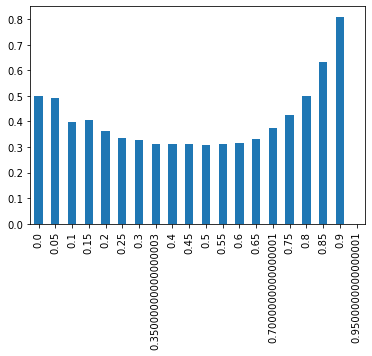

In [240]:
score_norm['sum'].plot.bar()

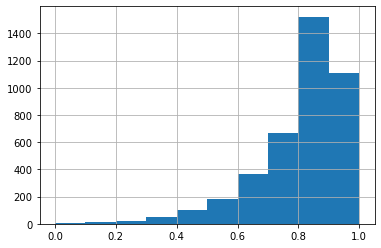

In [149]:
pd.Series(dec_test).hist()

In [252]:
scores[scores.index==0.05]

,mse,mae,percentage
0.05,1.110084e+12,516387.401712,0.999752


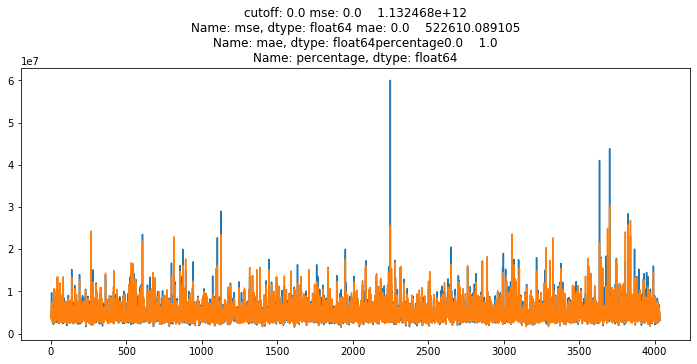

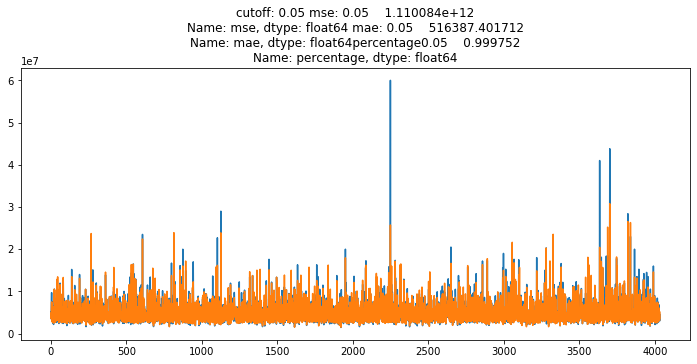

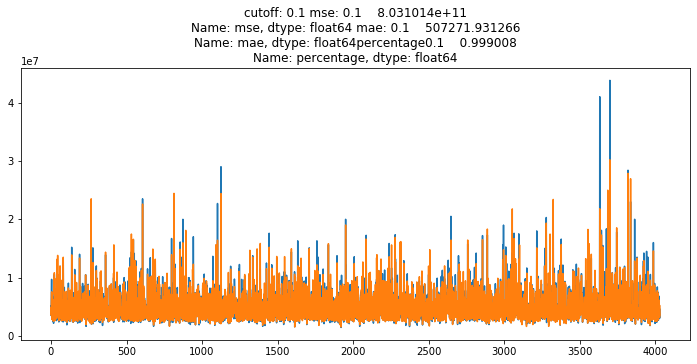

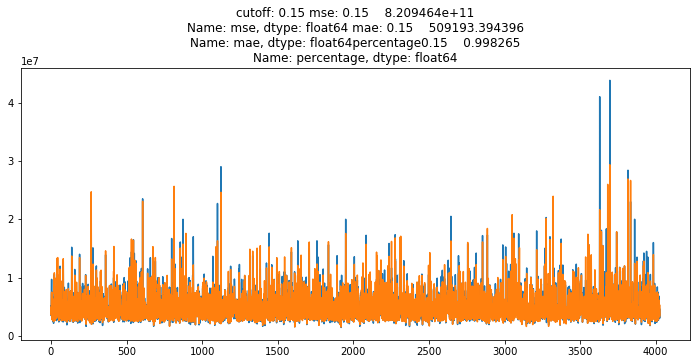

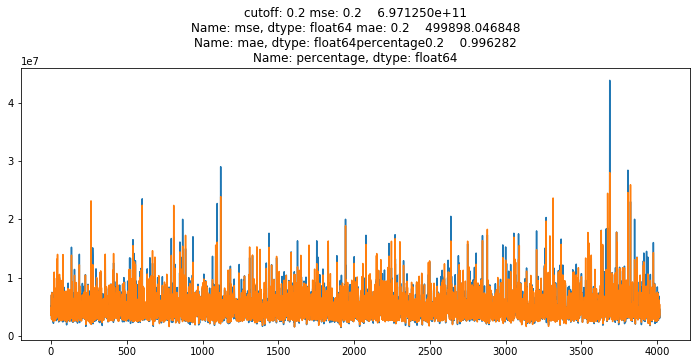

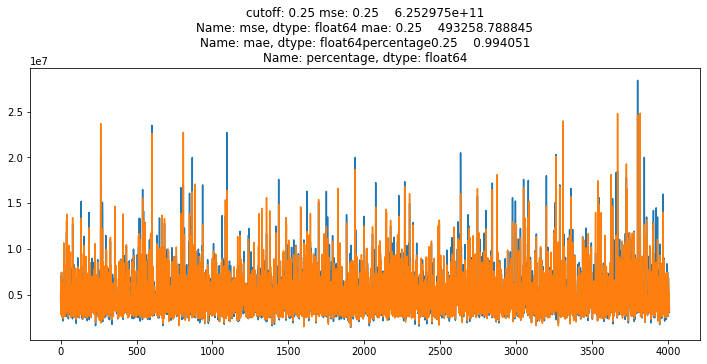

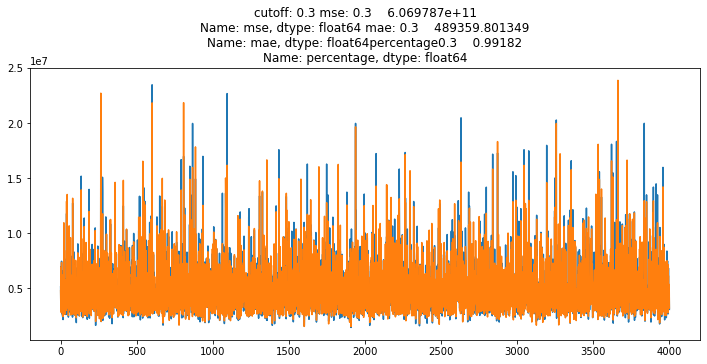

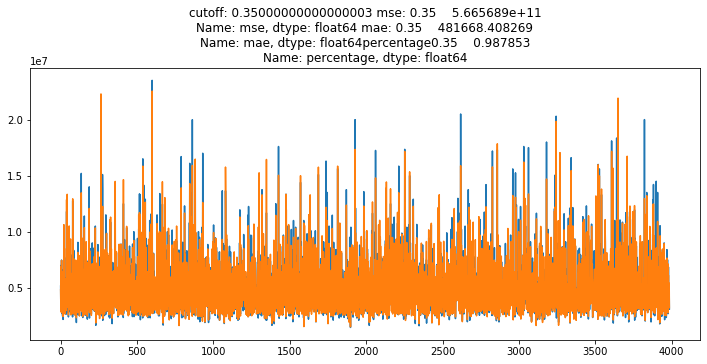

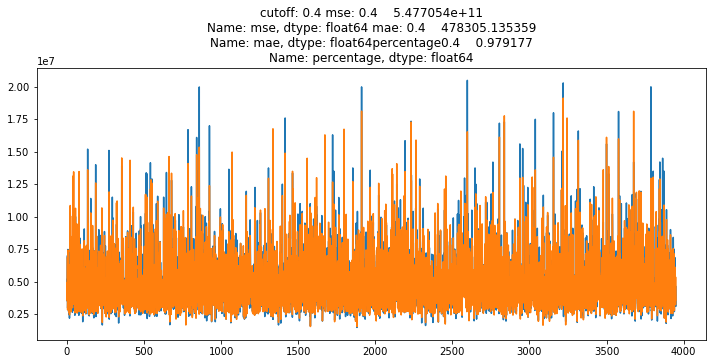

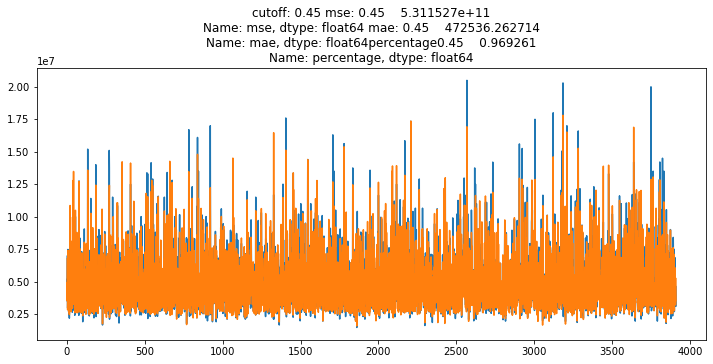

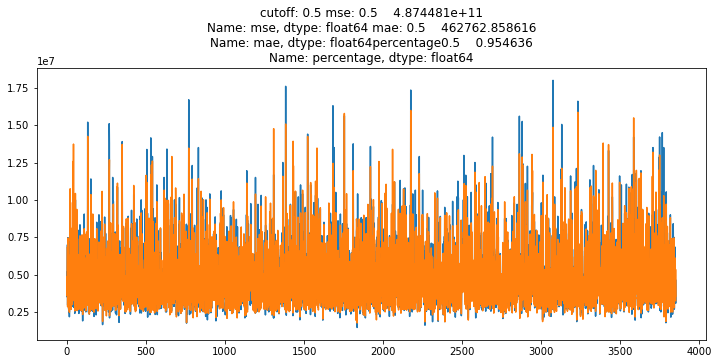

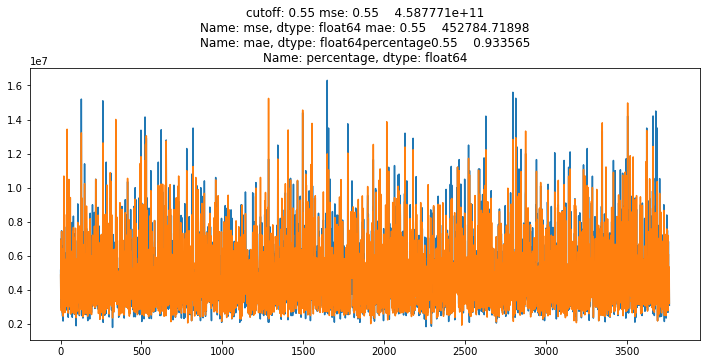

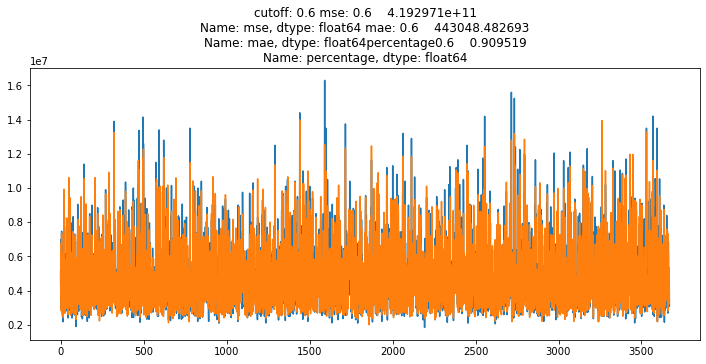

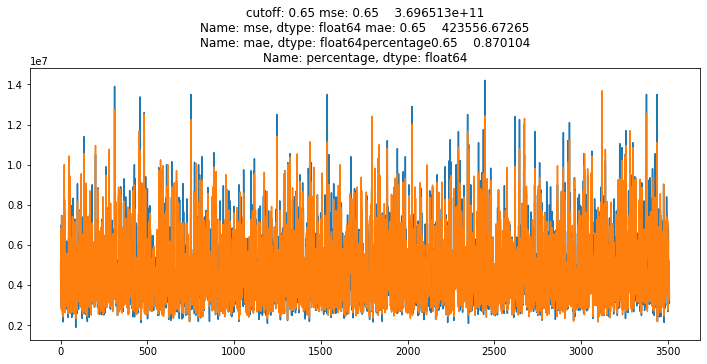

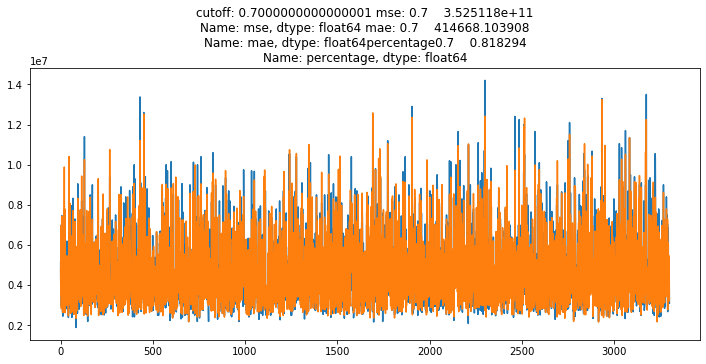

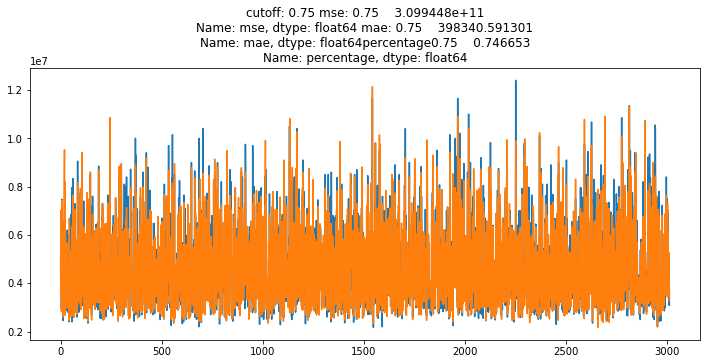

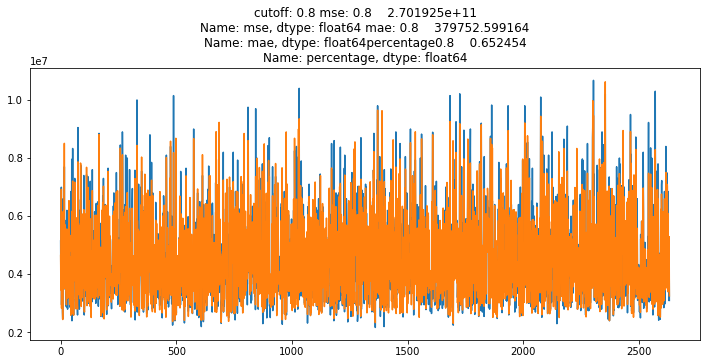

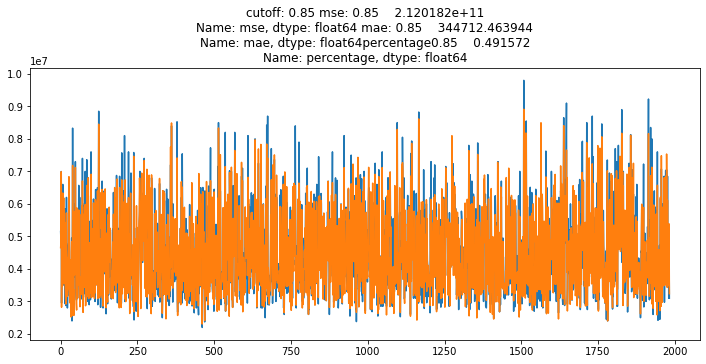

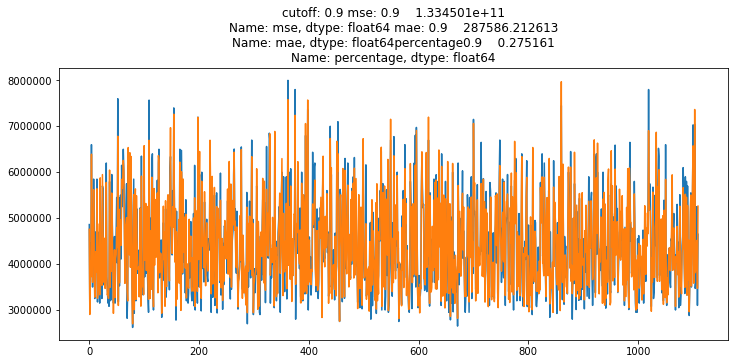

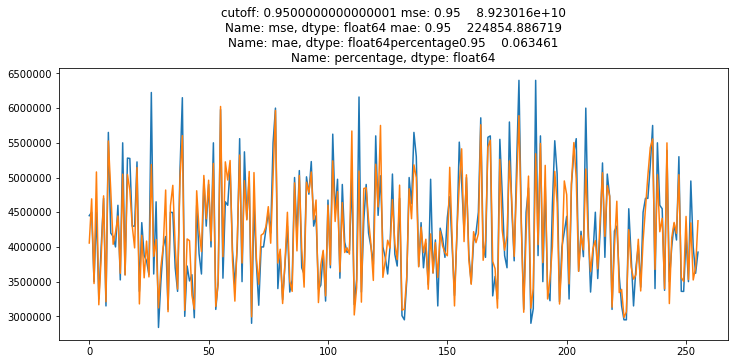

In [258]:
for c in cutoffs:
    cutoff_score = scores[scores.index==c]
    plt.figure(figsize=(12,5))
    plt.plot(y_test.loc[dec_test >= c].values)
    plt.plot(predictions[c])
    plt.title('cutoff: ' + str(cutoff_score.index.values[0]) + ' mse: ' + str(cutoff_score['mse']) + ' mae: ' + str(cutoff_score['mae']) + 'percentage' + str(cutoff_score['percentage']))
    plt.show()

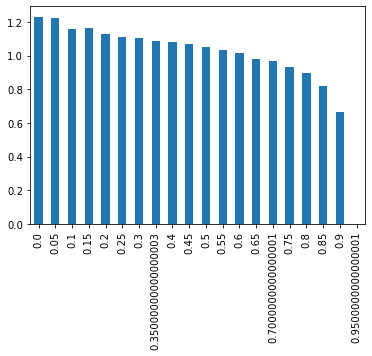

In [274]:
((score_norm.mse + score_norm.mae)**0.3).plot.bar()

In [246]:
predictions

{0.0: array([4923050., 3562700., 4884700., ..., 3455420., 5318450., 3270000.]),
 0.05: array([4845150., 3551020., 4922350., ..., 3503470., 5208750., 3235300.]),
 0.1: array([4792300., 3542900., 4829600., ..., 3446860., 5264450., 3218050.]),
 0.15: array([4888500., 3573750., 4844800., ..., 3488950., 5331580., 3301250.]),
 0.2: array([4818900., 3533900., 4858850., ..., 3513510., 5440200., 3236100.]),
 0.25: array([4855000., 3551100., 4955150., ..., 3504960., 5361800., 3230550.]),
 0.3: array([4799100., 3550500., 4887400., ..., 3458070., 5365100., 3215650.]),
 0.35000000000000003: array([4812450., 3521950., 4812150., ..., 3485150., 5417250., 3220800.]),
 0.4: array([4887650., 3551400., 4816350., ..., 3514110., 5349900., 3232650.]),
 0.45: array([4887850., 3532370., 4877700., ..., 3466610., 5270250., 3215650.]),
 0.5: array([4839500., 3575540., 4913500., ..., 3498420., 5344000., 3257250.]),
 0.55: array([4874600., 3538770., 4853500., ..., 3414050., 5348250., 3214250.]),
 0.6: array([488555

In [220]:
X_test.loc[dec_test < c_off]

,price_sqm,living_space,rent,bi_area,time,nbr_rooms,additional,area_gamla_stan,area_gardet,area_kungsholmen,area_lilla_essingen,area_ostermalm,area_sodermalm,area_stora_essingen,area_vasastan
977,138571.0,70.0,2293.0,29.0,0.980031,3.0,14520.0,0,0,0,0,0,0,0,1
6843,91923.0,130.0,7845.0,34.0,0.871966,3.0,9654.0,0,0,0,0,0,0,0,1
10558,113208.0,106.0,5929.0,44.0,0.714565,3.0,16200.0,0,0,0,0,1,0,0,0
11512,77326.0,129.0,5474.0,0.0,0.624119,6.0,14628.0,0,0,0,0,0,0,1,0
6849,88344.0,163.0,3547.0,22.0,0.871182,4.0,13500.0,0,0,0,0,0,0,0,1
13244,68692.0,107.0,2717.0,0.0,0.181676,4.0,17500.0,1,0,0,0,0,0,0,0
13033,40625.0,160.0,8933.0,0.0,0.300313,6.0,8393.0,0,0,0,1,0,0,0,0
2264,89899.0,99.0,5270.0,19.0,0.961237,4.0,16879.0,0,0,0,0,0,1,0,0
828,158470.0,183.0,8940.0,0.0,0.983164,5.0,0.0,0,0,0,0,1,0,0,0
1705,70988.0,162.0,7561.0,0.0,0.969068,5.0,13800.0,0,0,1,0,0,0,0,0


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_true = y_test_2
scoring = {'mse' : mean_squared_error, 
           'mae' : mean_absolute_error, 
           'evs' : explained_variance_score, 
           'r2' : r2_score}
predictions = {}
score_dict = {}
for k in fs_dict.keys():
    score_dict[k] = {}
    y_pred = fs_dict[k].predict(X_test_2)
    predictions[k] = y_pred
    for m in scoring.keys():
        score_dict[k][m] = scoring[m](y_true, y_pred)
    

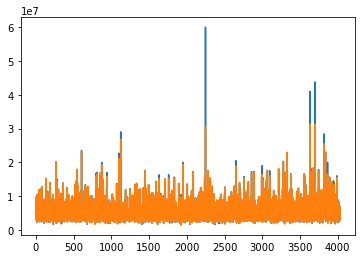

In [117]:

plt.plot(y_true.values)
plt.plot(predictions['RandomForest'])

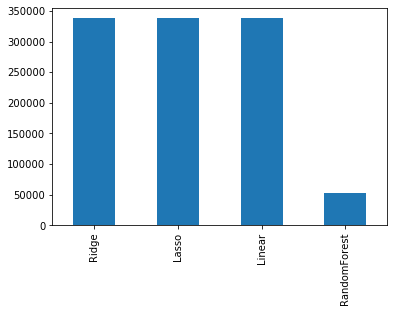

In [111]:
pd.DataFrame.from_dict(score_dict, orient='index')['mae'].plot.bar()